In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [72]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


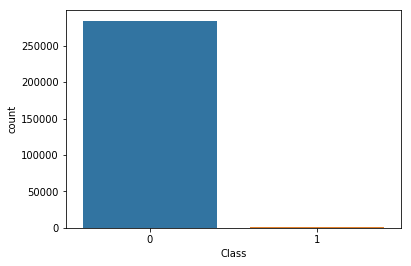

In [73]:
sns.countplot(data['Class'])

In [74]:
#We can see the imbalance in data

In [75]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [76]:
#After standardizing let us try to resolve imbalance by using undersampling as we have a large dataset

In [77]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [78]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [79]:
normal_indices = data[data.Class == 0].index

In [80]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

In [81]:
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [82]:
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [83]:
#This is our undersampled data

In [84]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))


Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [85]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [86]:
#Let us now use machine learning and create a model to predict frauds

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
# I have created a function to perform k folds cross validation which helps in obtaining a better insight to test the accuracy of the model
# More info at https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors],data[outcome]):
    # Filter the training data
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  model.fit(data[predictors],data[outcome]) 

In [89]:
X_undersample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231


In [90]:
#Using Logistic regression using the entire dataset

In [91]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

Y_pred = lg_model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Class'
classification_model(lg_model,data,predictor_var,outcome_var)

Accuracy : 99.920%
Cross-Validation Score : 99.884%
Cross-Validation Score : 99.895%
Cross-Validation Score : 99.900%
Cross-Validation Score : 99.910%
Cross-Validation Score : 99.915%


In [92]:
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[85284    12]
 [   56    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [93]:
#We can see that we have a very low recall
#That means real frauds are not detected properly which is a big problem for any banking company.

In [94]:
lg_model = LogisticRegression()
lg_model.fit(X_train_undersample, y_train_undersample)

Y_pred = lg_model.predict(X_test_undersample)

predictor_var = list(X_train_undersample[1:])
outcome_var='Class'
classification_model(lg_model,under_sample_data,predictor_var,outcome_var)

Accuracy : 95.122%
Cross-Validation Score : 82.234%
Cross-Validation Score : 84.772%
Cross-Validation Score : 87.817%
Cross-Validation Score : 89.340%
Cross-Validation Score : 90.554%


In [95]:
#We have a good accuracy. let us check recall and precision

In [96]:
print(confusion_matrix(y_test_undersample, Y_pred))
print(classification_report(y_test_undersample, Y_pred))

[[147   2]
 [ 13 134]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       149
           1       0.99      0.91      0.95       147

   micro avg       0.95      0.95      0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [97]:
#Let us now apply this model to the entire dataset

In [98]:
Y_pred = lg_model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Class'
classification_model(lg_model,data,predictor_var,outcome_var)

Accuracy : 99.920%
Cross-Validation Score : 99.884%
Cross-Validation Score : 99.895%
Cross-Validation Score : 99.900%
Cross-Validation Score : 99.910%
Cross-Validation Score : 99.915%


In [99]:
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[82729  2567]
 [   11   136]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.05      0.93      0.10       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [109]:
#We can see we have a recall of 0.93 and hence we can detect frauds with the accuracy of 0.93
#Even though we have a bad precision that means users might get calls regarding suspicisous activity
#but that is fine as long as real frauds are detected.

In [101]:
#Random Forest

In [102]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_undersample, y_train_undersample)

Y_pred = rf_model.predict(X_test)

#predictor_var = list(X_train[1:])
#outcome_var='Class'
#classification_model(rf_model,data,predictor_var,outcome_var)

In [103]:
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[82264  3032]
 [    6   141]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.96      0.08       147

   micro avg       0.96      0.96      0.96     85443
   macro avg       0.52      0.96      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [104]:
#Using SVM

In [105]:
svm_model = SVC()
svm_model.fit(X_train_undersample, y_train_undersample)

Y_pred = svm_model.predict(X_test)

#predictor_var = list(X_train[1:])
#outcome_var='Class'
#classification_model(svm_model,data,predictor_var,outcome_var)

In [106]:
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[80257  5039]
 [    9   138]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85296
           1       0.03      0.94      0.05       147

   micro avg       0.94      0.94      0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443

